In [1]:
from pycaret.utils import version
version()

'2.3.4'

In [3]:
from pycaret.datasets import get_data
data = get_data('us_presidential_election_results')

,cycle,state,dem_poll_avg,dem_poll_avg_margin,incumbent_party,incumbent_running,party_winner
0,1976,California,42.797994,-3.270222,republican,1,republican
1,1976,Colorado,42.180101,-1.373191,republican,1,republican
2,1976,Connecticut,41.698014,-1.469654,republican,1,republican
3,1976,Delaware,33.370748,2.445322,republican,1,democrat
4,1976,Georgia,59.796546,29.379760,republican,1,democrat


In [20]:
data.cycle = data.cycle.astype('float64')

<AxesSubplot:>

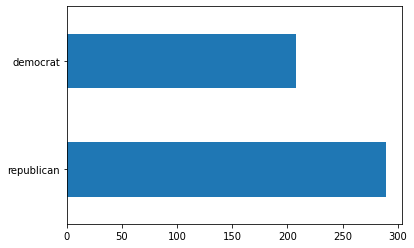

In [11]:
data.party_winner.value_counts().plot.barh()

In [23]:
from pycaret.classification import *
s = setup(data, target = 'party_winner', session_id = 123,
          log_experiment=True, log_plots=True, experiment_name = 'us_election_model')

,Description,Value
0,session_id,123
1,Target,party_winner
2,Target Type,Binary
3,Label Encoded,"democrat: 0, republican: 1"
4,Original Data,"(497, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9366,0.9907,0.9462,0.9511,0.9465,0.8680,0.8737,0.5080
xgboost,Extreme Gradient Boosting,0.9363,0.9857,0.9405,0.9552,0.9445,0.8693,0.8771,0.0640
rf,Random Forest Classifier,0.9307,0.9887,0.9314,0.9543,0.9403,0.8572,0.8634,0.0680
gbc,Gradient Boosting Classifier,0.9219,0.9823,0.9169,0.9525,0.9318,0.8403,0.8461,0.0280
lightgbm,Light Gradient Boosting Machine,0.9219,0.9752,0.9260,0.9461,0.9327,0.8390,0.8466,0.0450
dt,Decision Tree Classifier,0.9191,0.9171,0.9267,0.9419,0.9314,0.8321,0.8388,0.0040
knn,K Neighbors Classifier,0.9166,0.9776,0.9512,0.9193,0.9318,0.8235,0.8344,0.0090
et,Extra Trees Classifier,0.9135,0.9773,0.9174,0.9400,0.9267,0.8209,0.8262,0.0620
lr,Logistic Regression,0.9108,0.9842,0.9319,0.9244,0.9254,0.8139,0.8216,0.0100
ada,Ada Boost Classifier,0.9021,0.9513,0.9171,0.9237,0.9168,0.7968,0.8060,0.0260


In [25]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9429,0.9796,0.9524,0.9524,0.9524,0.8810,0.8810
1,0.8857,0.9864,0.9524,0.8696,0.9091,0.7561,0.7618
2,0.9714,0.9932,1.0000,0.9545,0.9767,0.9398,0.9415
3,0.9143,0.9320,1.0000,0.8750,0.9333,0.8148,0.8292
4,0.9143,0.9728,0.9048,0.9500,0.9268,0.8235,0.8250
5,0.9714,0.9456,1.0000,0.9545,0.9767,0.9398,0.9415
6,0.9429,1.0000,0.9000,1.0000,0.9474,0.8852,0.8911
7,0.8824,0.9821,0.8000,1.0000,0.8889,0.7671,0.7888
8,0.8824,0.9821,0.8000,1.0000,0.8889,0.7671,0.7888
9,0.9118,0.9786,0.9500,0.9048,0.9268,0.8159,0.8174


In [28]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8571,0.8333,0.9524,0.8333,0.8889,0.6914,0.7035
2,0.9714,0.9762,0.9524,1.0000,0.9756,0.9412,0.9428
3,0.8857,0.8690,0.9524,0.8696,0.9091,0.7561,0.7618
4,0.8857,0.8929,0.8571,0.9474,0.9000,0.7674,0.7727
5,0.9429,0.9405,0.9524,0.9524,0.9524,0.8810,0.8810
6,0.9714,0.9667,1.0000,0.9524,0.9756,0.9412,0.9428
7,0.8824,0.9000,0.8000,1.0000,0.8889,0.7671,0.7888
8,0.9118,0.9250,0.8500,1.0000,0.9189,0.8235,0.8367
9,0.8824,0.8679,0.9500,0.8636,0.9048,0.7518,0.7577


In [29]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9714,0.9949,0.9524,1.0000,0.9756,0.9412,0.9428
1,0.8857,0.9847,0.9524,0.8696,0.9091,0.7561,0.7618
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8857,0.8827,0.9524,0.8696,0.9091,0.7561,0.7618
4,0.8571,0.9320,0.8095,0.9444,0.8718,0.7126,0.7235
5,0.9429,0.9609,0.9524,0.9524,0.9524,0.8810,0.8810
6,0.8571,0.9517,0.9000,0.8571,0.8780,0.7059,0.7071
7,0.9118,0.9518,0.8500,1.0000,0.9189,0.8235,0.8367
8,0.9118,0.9250,0.8500,1.0000,0.9189,0.8235,0.8367
9,0.8824,0.9839,0.9500,0.8636,0.9048,0.7518,0.7577


In [35]:
lgbs = []
for i in [0.1,0.2,0.3,0.4,0.5]:
    lgbs.append(create_model('lightgbm', learning_rate = i))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.9694,0.9048,0.9048,0.9048,0.7619,0.7619
1,0.8571,0.9320,0.9524,0.8333,0.8889,0.6914,0.7035
2,0.9429,0.9966,0.9524,0.9524,0.9524,0.8810,0.8810
3,0.9143,0.9490,1.0000,0.8750,0.9333,0.8148,0.8292
4,0.9143,0.9728,0.9048,0.9500,0.9268,0.8235,0.8250
5,0.9714,0.9354,1.0000,0.9545,0.9767,0.9398,0.9415
6,0.9429,1.0000,0.9000,1.0000,0.9474,0.8852,0.8911
7,0.9118,0.9857,0.8500,1.0000,0.9189,0.8235,0.8367
8,0.8824,0.9786,0.8000,1.0000,0.8889,0.7671,0.7888
9,0.9412,0.9607,1.0000,0.9091,0.9524,0.8759,0.8827


In [26]:
!mlflow ui

^C
